# Проект: оптимизация маркетинговых затрат.

### Цель проекта:
Рассчитать основные метрики по продукту, продажам и маркетингу. Определить эффективные каналы маркетинговых затрат.

Продукт
	• Количество пользователей в день, неделю, месяц.
	• Количество сессий в день.
	• Длительность одной сессии.
	• Как часто люди возвращаются.
    
Продажи
	• Дата первой покупки на сайте
	• Количество покупок за период.
	• Размер среднего чек.
	• Доход от пользователей (LTV)
    
Маркетинг
	• Маркетинговые расходы. Всего / на каждый источник / по времени
	• Маркетинговые расходы на одного пользователя из каждого источника.
	• Окупаемость маркетинговых расходов (ROI).

### Описание данных

#### Таблица visits (лог сервера с информацией о посещениях сайта):

уникальный идентификатор пользователя

категория устройства пользователя

дата и время начала сессии

дата и время окончания сессии

идентификатор рекламного источника, из которого пришел пользователь
#### Таблица orders (информация о заказах):

уникальный id пользователя, который сделал заказ

дата и время заказа

выручка Яндекс.Афиши с этого заказа
#### Таблица costs (информация о затратах на маркетинг):

идентификатор рекламного источника

дата

затраты на этот рекламный источник в этот день

### 1. Загрузка данных и их подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)

#### a. Загрузим лог сервера с данными о посещениях сайта Яндекс.Афиши

In [2]:
visits_log = pd.read_csv('visits_log.csv')
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
# определим наличие дубликатов
visits_log.duplicated().sum()

0

Требуется изменить тип данных в колонках End Ts, Start Ts на datetime.
Требуется привести названия колонок к нижнему регистру.

In [5]:
# приводим название колонок к нижнему регистру
visits_log.set_axis(['device','end_ts','source_id','start_ts','uid'],axis='columns', inplace=True)


In [6]:
# меняем тип данных в колонках end_ts, start_ts на datetime
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [7]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


#### b. Загрузим данные заказов за период с июня 2017 по конец мая 2018 года:



In [8]:
orders_log = pd.read_csv('orders_log.csv')
orders_log.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [9]:
# определим наличие дубликатов
orders_log.duplicated().sum()

0

In [10]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Требуется изменить тип данных в колонках Buy Ts на datetime.
Требуется привести названия колонок к нижнему регистру.

In [11]:
# приводим название колонок к нижнему регистру
orders_log.set_axis(['buy_ts','revenue','uid'],axis='columns', inplace=True)

In [12]:
# меняем тип данных в колонках buy_ts на datetime
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'], format='%Y-%m-%d %H:%M:%S')

In [13]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


#### c. Загрузим данные по статистике рекламных расходов

In [14]:
costs_log = pd.read_csv('costs.csv')
costs_log['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

In [15]:
costs_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Требуется изменить тип данных в колонках dt на datetime.

In [16]:
# определим наличие дубликатов
costs_log.duplicated().sum()

0

In [17]:
# меняем тип данных в колонках buy_ts на datetime
costs_log['dt'] = pd.to_datetime(costs_log['dt'], format='%Y-%m-%d %H:%M:%S')

In [18]:
costs_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


### 2. Рассчет метрик и построение отчетов.

### a. Расчет метрик по продукту.

#### Оценка пользовательской активности DAU, WAU, MAU 

In [19]:
activity_users = visits_log.copy()

In [20]:
activity_users['session_year'] = activity_users['start_ts'].dt.year
activity_users['session_month'] = activity_users['start_ts'].dt.month
activity_users['session_week'] = activity_users['start_ts'].dt.week
activity_users['session_date'] = activity_users['start_ts'].dt.date
# приведем session_date к типу datetime
activity_users['session_date'] = pd.to_datetime(activity_users['session_date'], format='%Y-%m-%d')
activity_users

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02


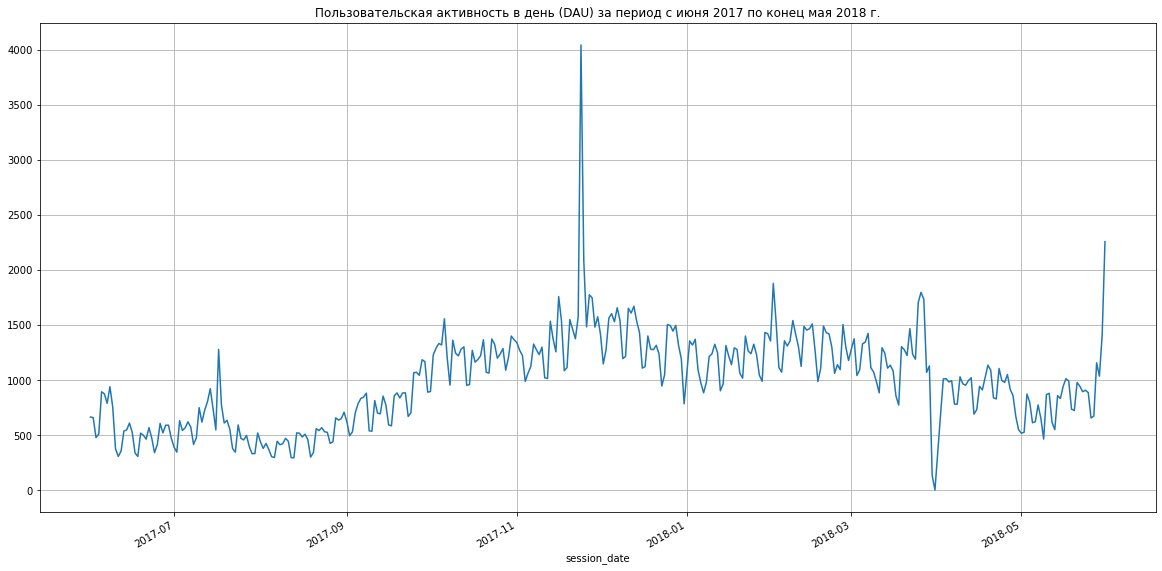

In [21]:
# построим график DAU
(activity_users.groupby('session_date')['uid'].count()
           .plot(title='Пользовательская активность в день (DAU) за период с июня 2017 по конец мая 2018 г.',
                 figsize=(20,10), grid=True, y='uid')
)

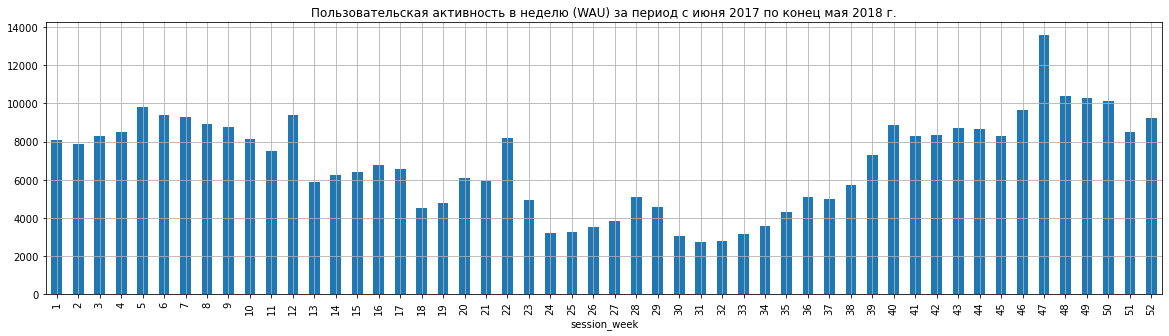

In [22]:
# построим график WAU
(activity_users.groupby('session_week')['uid'].count()
           .plot(kind='bar', title='Пользовательская активность в неделю (WAU) за период с июня 2017 по конец мая 2018 г.',
                 figsize=(20,5), grid=True)
)

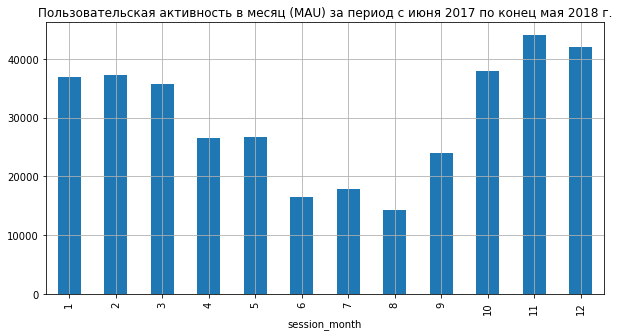

In [23]:
# построим график МAU
(activity_users.groupby('session_month')['uid'].count()
           .plot(kind='bar', title='Пользовательская активность в месяц (МAU) за период с июня 2017 по конец мая 2018 г.',
                 figsize=(10,5), grid=True)
)

In [24]:
# рассчитаем средние значения пользовательской активности DAU, WAU, MAU за период с июня 2017 по конец мая 2018 г.
dau_total = activity_users.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = activity_users.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = activity_users.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

In [25]:
print('dau_total = ', int(dau_total))
print('wau_total = ', int(wau_total))
print('mau_total = ', int(mau_total))

dau_total =  907
wau_total =  5716
mau_total =  23228


Вывод: 
Пользовательская активность максимальна в осенние и зимние месяцы. В летние месяцы активность пользователей минимальна. Наибольшая дневная активность пользователей происходит в будние дни. В выходные и праздничные дни дневная активность значительно снижается. Максимальное количество пользователей в день зафиксировано 24.11.2017 г. и составило 4042 уникальных пользователя.
За период с июня 2017 по конец мая 2018 года получили среднее значение количества уникальных пользователей в день равное 907. Среднее значение количества уникальных пользователей в неделю равное 5716. Среднее значение количества уникальных пользователей в месяц равное 23228.

#### Пользовательская сессия


In [26]:
# рассчитаем кол-во сессий в день
sessions_per_user = activity_users.groupby('session_date').agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print(sessions_per_user)

              n_sessions  n_users  sessions_per_user
session_date                                        
2017-06-01           664      605           1.097521
2017-06-02           658      608           1.082237
2017-06-03           477      445           1.071910
2017-06-04           510      476           1.071429
2017-06-05           893      820           1.089024
...                  ...      ...                ...
2018-05-27           672      620           1.083871
2018-05-28          1156     1039           1.112608
2018-05-29          1035      948           1.091772
2018-05-30          1410     1289           1.093871
2018-05-31          2256     1997           1.129695

[364 rows x 3 columns]


<function matplotlib.pyplot.show(*args, **kw)>

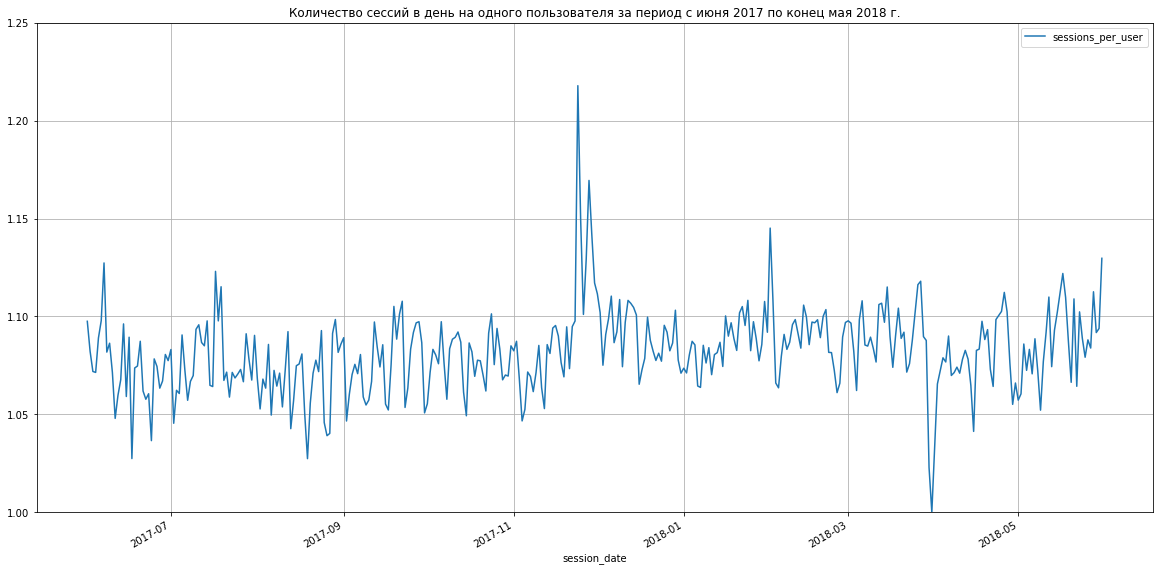

In [27]:
# построим график DAU
(sessions_per_user.plot(title='Количество сессий в день на одного пользователя за период с июня 2017 по конец мая 2018 г.',
                 figsize=(20,10), grid=True, y='sessions_per_user')
)
plt.ylim(1, 1.25)
plt.show

In [28]:
sessions_per_user['sessions_per_user'].mean()

1.0821696440039723

Вывод: на 1 пользователя приходится чуть более 1 сессии в день. В среднем 1.08 сессии на пользователя.

In [29]:
activity_users

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02


In [30]:
# Сколько длится одна сессия?
activity_users['session_duration_sec'] = (activity_users['end_ts'] - activity_users['start_ts']).dt.seconds

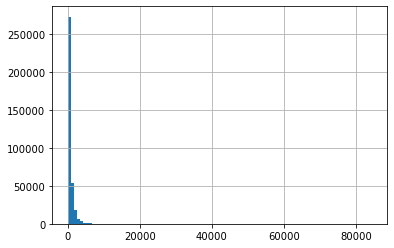

In [31]:
activity_users['session_duration_sec'].hist(bins=100)

Длина сессий распределена неравномерно. 35 794 сессии с нулевым временем.

In [32]:
# Найдите значение метрики ASL (средняя продолжительность сессии). Т.к. длина сессий распределена неравномерно используем моду.
asl = activity_users['session_duration_sec'].mode()
asl

0    60
dtype: int64

Средняя продолжительность сессии составляет 60 секунд.

#### Определим метрику Retention Rate, что бы узнать как часто люди возвращаются.


In [33]:
# сформируем когорту по месячной активности пользователей.
# Для каждого клиента получим дату его первого заказа 
first_activity_date = activity_users.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'

In [34]:
activity_users = activity_users.join(first_activity_date, on='uid')

In [35]:
# выделим из столбцов first_activity_date и start_ts месяцы первой и последующих активностей пользователя
activity_users['first_activity_month'] = activity_users['first_activity_date'].astype('datetime64[M]')
activity_users['activity_month'] = activity_users['start_ts'].astype('datetime64[M]')
activity_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   device                359400 non-null  object        
 1   end_ts                359400 non-null  datetime64[ns]
 2   source_id             359400 non-null  int64         
 3   start_ts              359400 non-null  datetime64[ns]
 4   uid                   359400 non-null  uint64        
 5   session_year          359400 non-null  int64         
 6   session_month         359400 non-null  int64         
 7   session_week          359400 non-null  int64         
 8   session_date          359400 non-null  datetime64[ns]
 9   session_duration_sec  359400 non-null  int64         
 10  first_activity_date   359400 non-null  datetime64[ns]
 11  first_activity_month  359400 non-null  datetime64[ns]
 12  activity_month        359400 non-null  datetime64[ns]
dtyp

In [36]:
# рассчитаем lifetime пользователя в рамках когорты.
activity_users['cohort_lifetime'] = activity_users['activity_month'] - activity_users['first_activity_month']
activity_users['cohort_lifetime'] = activity_users['cohort_lifetime'] / np.timedelta64(1,'M')
activity_users['cohort_lifetime'] = activity_users['cohort_lifetime'].round().astype(int)
activity_users.head(100).T 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
device,touch,desktop,touch,desktop,desktop,desktop,desktop,touch,desktop,desktop,desktop,desktop,desktop,desktop,touch,touch,desktop,desktop,desktop,desktop,touch,touch,desktop,touch,desktop,...,touch,desktop,desktop,desktop,desktop,desktop,touch,desktop,desktop,desktop,desktop,touch,desktop,touch,desktop,desktop,touch,desktop,desktop,desktop,desktop,desktop,desktop,desktop,desktop
end_ts,2017-12-20 17:38:00,2018-02-19 17:21:00,2017-07-01 01:54:00,2018-05-20 11:23:00,2017-12-27 14:06:00,2017-09-03 21:36:00,2018-01-30 12:09:00,2017-11-05 15:15:00,2017-07-19 10:44:00,2017-11-08 13:43:00,2017-07-14 12:44:00,2018-01-25 19:41:00,2018-02-06 15:50:00,2017-11-27 14:43:00,2018-04-23 18:01:00,2018-02-12 20:30:00,2018-05-14 08:45:00,2018-05-30 08:51:00,2018-04-05 16:35:00,2018-05-17 19:26:00,2018-01-16 19:04:00,2017-11-01 00:23:00,2017-06-21 15:01:00,2017-12-26 17:35:00,2018-02-01 15:38:00,...,2018-01-29 20:25:00,2018-03-23 20:15:00,2017-10-18 12:04:00,2018-01-25 12:40:00,2018-02-03 13:43:00,2018-04-22 11:18:00,2017-09-04 17:15:00,2017-12-13 10:56:00,2018-01-30 16:30:00,2017-10-14 18:15:00,2018-04-20 14:38:00,2017-08-23 16:51:00,2017-11-28 18:23:00,2018-03-20 22:23:00,2017-11-07 23:38:00,2018-03-28 22:35:00,2017-06-04 03:14:00,2017-11-04 12:58:00,2018-04-25 10:58:00,2017-10-29 14:58:00,2018-04-12 18:16:00,2018-02-03 22:56:00,2018-01-27 23:17:00,2018-05-30 09:41:00,2018-01-30 09:28:00
source_id,4,2,5,9,3,5,1,3,3,5,5,1,4,3,9,2,5,5,10,2,3,3,5,4,4,...,3,5,10,4,3,4,3,3,3,5,3,4,1,3,5,3,4,10,4,3,3,4,4,5,2
start_ts,2017-12-20 17:20:00,2018-02-19 16:53:00,2017-07-01 01:54:00,2018-05-20 10:59:00,2017-12-27 14:06:00,2017-09-03 21:35:00,2018-01-30 11:13:00,2017-11-05 15:14:00,2017-07-19 10:41:00,2017-11-08 13:42:00,2017-07-14 12:43:00,2018-01-25 19:37:00,2018-02-06 15:45:00,2017-11-27 14:42:00,2018-04-23 18:00:00,2018-02-12 19:24:00,2018-05-14 08:39:00,2018-05-30 08:49:00,2018-04-05 16:28:00,2018-05-17 18:10:00,2018-01-16 18:56:00,2017-11-01 00:16:00,2017-06-21 14:31:00,2017-12-26 17:30:00,2018-02-01 15:11:00,...,2018-01-29 20:23:00,2018-03-23 20:00:00,2017-10-18 12:00:00,2018-01-25 12:31:00,2018-02-03 13:40:00,2018-04-22 11:11:00,2017-09-04 17:15:00,2017-12-13 10:50:00,2018-01-30 16:04:00,2017-10-14 18:05:00,2018-04-20 14:37:00,2017-08-23 16:48:00,2017-11-28 18:09:00,2018-03-20 22:12:00,2017-11-07 23:36:00,2018-03-28 22:18:00,2017-06-04 03:11:00,2017-11-04 12:30:00,2018-04-25 10:35:00,2017-10-29 14:51:00,2018-04-12 18:14:00,2018-02-03 22:56:00,2018-01-27 23:14:00,2018-05-30 09:40:00,2018-01-30 09:20:00
uid,16879256277535980062,104060357244891740,7459035603376831527,16174680259334210214,9969694820036681168,16007536194108375387,6661610529277171451,11423865690854540312,2987360259350925644,1289240080042562063,14879997728223227242,7478054213403174082,8056418121947262981,1989613820989570316,18026419100367255411,18188358787673499603,13958332529722257330,7415904268540941371,17023906935283809754,14243397340327062268,3290526361933478358,9772781220677269425,10245950763288728156,11451610027598174149,12375289438043468944,...,2091195818082464751,10037006419345458631,6966437274056194785,14063997464143962003,3776677008857031003,5120730368185029527,11406453429526853581,14259519155654778234,15667207291200562748,9781067627250906649,2462496199403354266,10159700009489311763,16492589737450352194,14846043669385494448,9382877237651299415,2489709968553445691,13196018916609154741,4582305129904762915,1537625877943017452,17215196045202835890,11884437754514720009,6334769865481375809,1891695106718180480,14257835459223818569,13153933924358373075
session_year,2017,2018,2017,2018,2017,2017,2018,2017,2017,2017,2017,2018,2018,2017,2018,2018,2018,2018,2018,2018,2018,2017,2017,2017,2018,...,2018,2018,2017,2018,2018,2018,2017,2017,2018,2017,2018,2017,2017,2018,2017,2018,2017,2017,2018,2017,2018,2018,2018,2018,2018
session_month,12,2,7,5,12,9,1

In [37]:
# сформируем когорту по first_activity_month и lifetime.
cohorts_activity_month = activity_users.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [38]:
cohorts_activity_month

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [39]:
# Найдём исходное количество пользователей в когорте. Возьмём их число на нулевую неделю:
initial_users_count = cohorts_activity_month[cohorts_activity_month['cohort_lifetime'] == 0][['first_activity_month','uid']]

In [40]:
#Переименуем столбец uid в cohort_uid методом rename()
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [41]:
initial_users_count

,first_activity_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [42]:
#Объединим данные по когортам с исходным количеством пользователей в когорте методом merge()
cohorts_activity_month = cohorts_activity_month.merge(initial_users_count,on='first_activity_month')

In [43]:
#  рассчитаем Retention Rate. 
#Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте.
cohorts_activity_month['retention'] = cohorts_activity_month['uid']/cohorts_activity_month['cohort_users']
cohorts_activity_month

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


In [44]:
# Построим сводную таблицу и создадим отчет:
retention_pivot = cohorts_activity_month.pivot_table(index='first_activity_month',
                                                     columns='cohort_lifetime',
                                                     values='retention',aggfunc='sum')

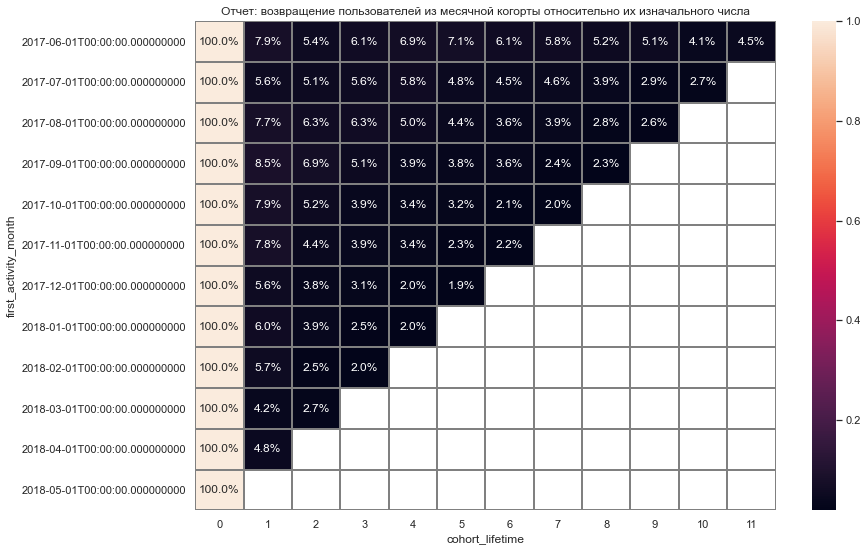

In [45]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Отчет: возвращение пользователей из месячной когорты относительно их изначального числа')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

### b. Расчет метрик по продажам.

	• Когда люди начинают покупать?
	• Сколько раз покупают за период?
	• Какой средний чек?
	• Сколько денег приносят? (LTV)


#### Определим, когда пользователи совершают перву покупку.

In [46]:
# найдем дату первой покупки каждого пользователя
orders = orders_log.copy()

In [47]:
# добавим в таблицу столбец с месяцем заказа
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   buy_ts       50415 non-null  datetime64[ns]
 1   revenue      50415 non-null  float64       
 2   uid          50415 non-null  uint64        
 3   order_month  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.5 MB


In [48]:
# найдем месяц первой покупки каждого пользователя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [49]:
#Добавим месяц первой покупки каждого пользователя в таблицу с заказами
orders = pd.merge(orders,first_orders, on='uid')
orders

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01


In [50]:
orders['month_lifetime'] = orders['order_month'] - orders['first_order_month']
orders['month_lifetime'] = orders['month_lifetime'] / np.timedelta64(1,'M')
orders['month_lifetime'] = orders['month_lifetime'].round().astype(int)
orders

,buy_ts,revenue,uid,order_month,first_order_month,month_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,0


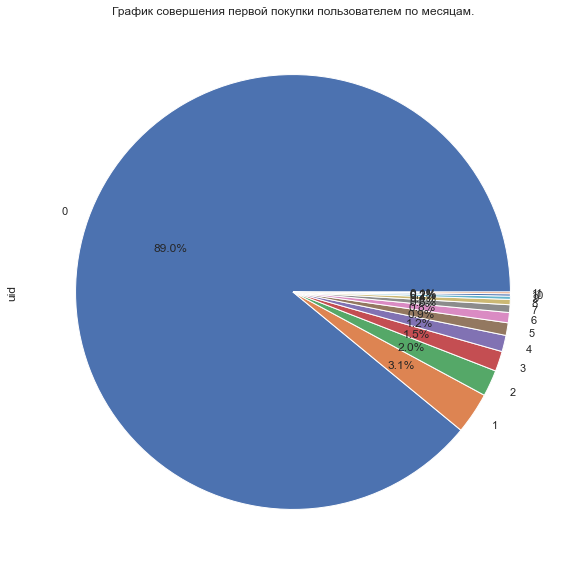

In [51]:
orders_group_month_lifetime = orders.groupby('month_lifetime').agg({'uid':'nunique'})
orders_group_month_lifetime.plot(kind='pie', y=('uid'), autopct='%1.1f%%', legend=False, figsize=(10, 10),
                                                    title='График совершения первой покупки пользователем по месяцам.')


Первую покупку 89 % пользователей совершают в месяц начала пользования Яндекс.Афиша

#### Найдем количество покупок, совершаемых пользователями внутри одной когорты в следующие месяцы.

In [52]:
# для определения людей, которые  продолжают покупать в следующих месяцах после совершения первой покупки 
# построим сводную таблицу методом pivot_table()
orders_pivot_table_n_buyers = orders.pivot_table(index='first_order_month',
    columns='order_month',
    values='uid',
    aggfunc='nunique')

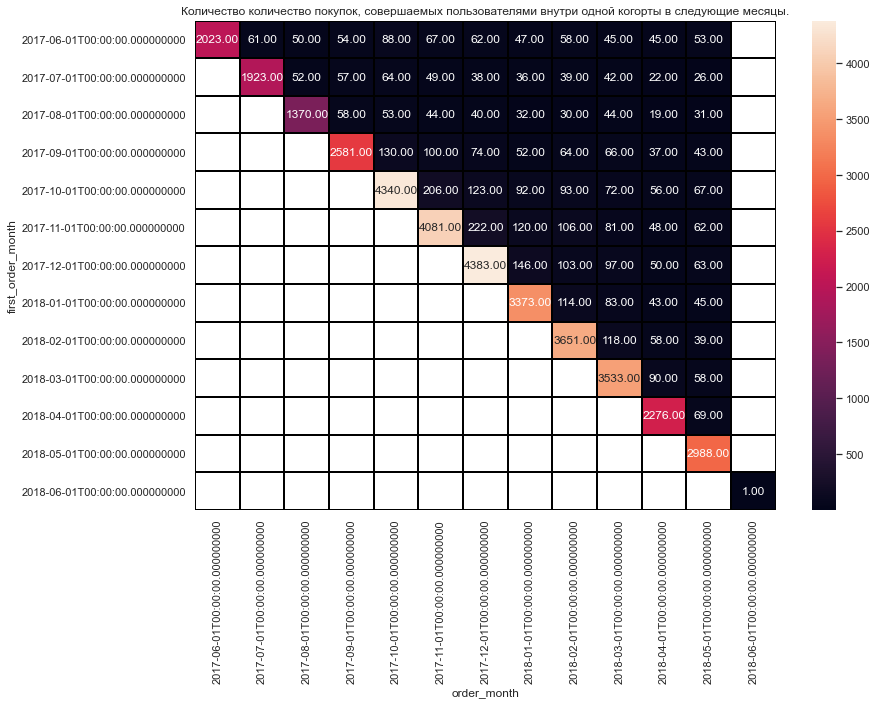

In [53]:
plt.figure(figsize=(13,9))
plt.title('Количество количество покупок, совершаемых пользователями внутри одной когорты в следующие месяцы.')
sns.heatmap(orders_pivot_table_n_buyers, annot=True, fmt='.2f', linewidths=1, linecolor='black')

Вывод: После первого месяца количество покупателей в когорте снижается.

Начиная с октября 2017 г. и до декабря 2017 г. количество покупок новых пользователей растет и наблюдается небольшой рост покупок в когортах за июнь и июль.

#### Определим средний чек.

In [54]:
orders

,buy_ts,revenue,uid,order_month,first_order_month,month_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,0


In [55]:
#Сгруппируем таблицу заказов по когорте за месяц первой покупки и месяцу совершения заказа и сложим выручку
cohorts_order_average_check = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum','uid':'nunique'}).reset_index()
cohorts_order_average_check

,first_order_month,order_month,revenue,uid
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,61
2,2017-06-01,2017-08-01,885.34,50
3,2017-06-01,2017-09-01,1931.30,54
4,2017-06-01,2017-10-01,2068.58,88
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,58
75,2018-04-01,2018-04-01,10600.69,2276
76,2018-04-01,2018-05-01,1209.92,69
77,2018-05-01,2018-05-01,13925.76,2988


In [56]:
# Найдём средний чек когорты покупателей по месяцам
cohorts_order_average_check['revenue_per_user'] = cohorts_order_average_check['revenue'] / cohorts_order_average_check['uid']

In [57]:
# Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, 
# как изменяется средний чек с течением времени
cohorts_order_average_check_pivot_table = cohorts_order_average_check.pivot_table(index='first_order_month',
                                        columns='order_month',
                                        values='revenue_per_user',
                                        aggfunc='mean')

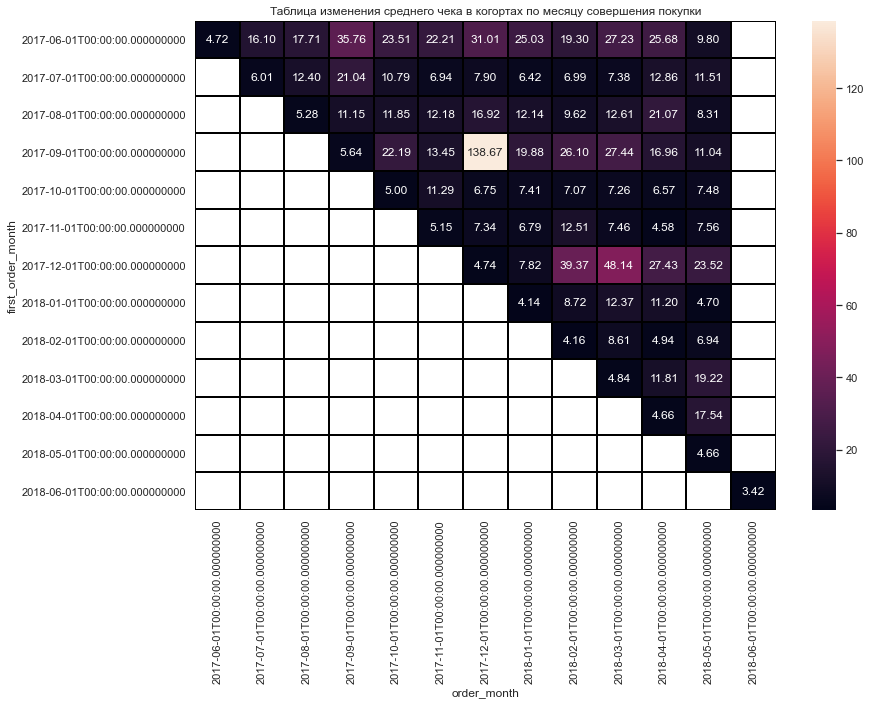

In [58]:
plt.figure(figsize=(13,9))
plt.title('Таблица изменения среднего чека в когортах по месяцу совершения покупки')
sns.heatmap(cohorts_order_average_check_pivot_table, annot=True, fmt='.2f', linewidths=1, linecolor='black')

Вывод: Средний чек в целом выше у июньской когорты, чем у остальных когорт. Наблюдается аномальный рост среднего чека у сентябрьской когорты в декабре. Возможно это связано с очень дорогими заказами нескольких покупаелей. Так же в декабре есть рост среднего чека и у остальных когорт, который может быть вызванным предновогодними акциями. Так же рост среднего чека у декабрьской и сентябрьской когорты наблюдается в феврале марте, что также может быть связано с праздничными днями в эти месяцы.

#### Сколько денег приносят? (LTV)


In [59]:
# Посчитаем количество новых покупателей (n_buyers) за каждый месяц
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [60]:
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [61]:
orders

,buy_ts,revenue,uid,order_month,first_order_month,month_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,0


In [62]:
#Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку
cohorts_ltv = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts_ltv

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [63]:
#  Добавим в таблицу cohorts_ltv данные о том, сколько людей первый раз совершили покупку в каждый месяц
ltv_report = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')

In [64]:
# добавим столбец age с возрастом когорты в 1 месяц
ltv_report['age'] = (ltv_report['order_month'] - ltv_report['first_order_month']) / np.timedelta64(1, 'M')
ltv_report['age'] = ltv_report['age'].round().astype('int')

In [65]:
# Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. 
# Маржинальность примем как незначительную и валовую прибыль посчитаем как revenue
ltv_report['ltv'] = ltv_report['revenue'] / ltv_report['n_buyers']
ltv_report

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


In [66]:
ltv_report_output = ltv_report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')


In [67]:
# посчитаем накопительный ltv каждой когорты 
ltv_report_output = ltv_report_output.cumsum(axis=1)

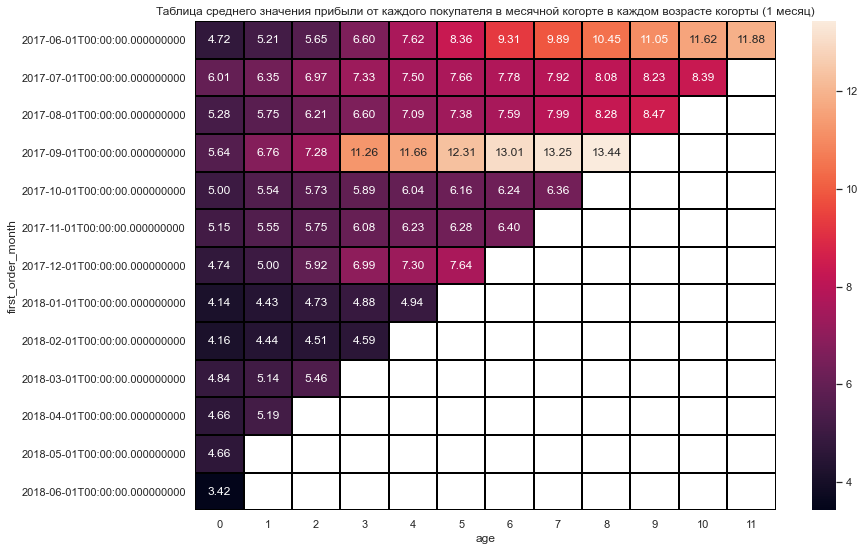

In [68]:
plt.figure(figsize=(13,9))
plt.title('Таблица среднего значения прибыли от каждого покупателя в месячной когорте в каждом возрасте когорты (1 месяц)')
sns.heatmap(ltv_report_output, annot=True, fmt='.2f', linewidths=1, linecolor='black')

In [69]:
# посчитаем средний LTV  за 6 месяцев с первой покупки.
total_cum_ltv = ltv_report_output.mean(axis=0).cumsum()[5]
total_cum_ltv

37.976608404196625

Вывод: посчитав итоговый LTV по месячным когортам, можно увидеть, что наибольший доход принесла сентябрьская когорта, несмотря на меньший возраст. В этой когорте в среднем каждый пользователь принес по 13,44.
Средний LTV всех когорт за 6 месяцев после первой покупки составляет 37,97.

### с. Расчет метрик по маркетингу
	• Сколько денег потратили? Всего / на каждый источник / по времени
	• Сколько стоило привлечение одного покупателя из каждого источника?
	• На сколько окупились расходы? (ROI)


### • Рассчитаем сумму затрат на маркетинг.

In [70]:
costs = costs_log.copy()
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [71]:
# Всего потрачено не маркетинг
costs['costs'].sum()

329131.62

 ##### Всего потрачено не маркетинг за весь период - 329 131.62

In [72]:
# рассчитаем затраты по источникам рекламы
costs.groupby('source_id')['costs'].sum()

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

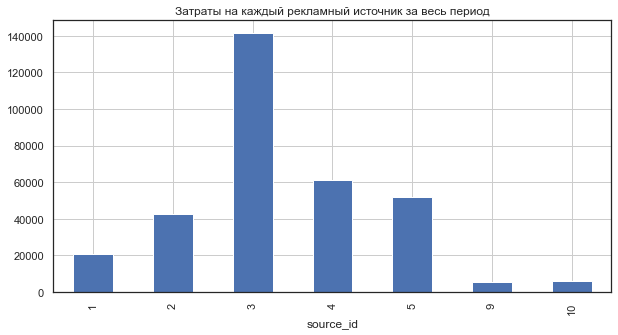

In [73]:
costs_sourse = costs.groupby('source_id')['costs'].sum()
costs_sourse
(costs.groupby('source_id')['costs'].sum()
           .plot(kind='bar', title='Затраты на каждый рекламный источник за весь период',
                 figsize=(10,5), grid=True)
)

#### Больше всего затрат за весь период было выделено на рекламный источник №3, а именно 141 321.63, на источник №4 - 61 073.60, на источник №5 - 5 1757.10

In [74]:
#  Определим как затраты были распределены оп времени, для этого выделим месяцы из дат в таблице с расходами.
costs['month'] = costs['dt'].astype('datetime64[M]')

In [75]:
month_cac = costs.groupby('month')['costs'].sum()

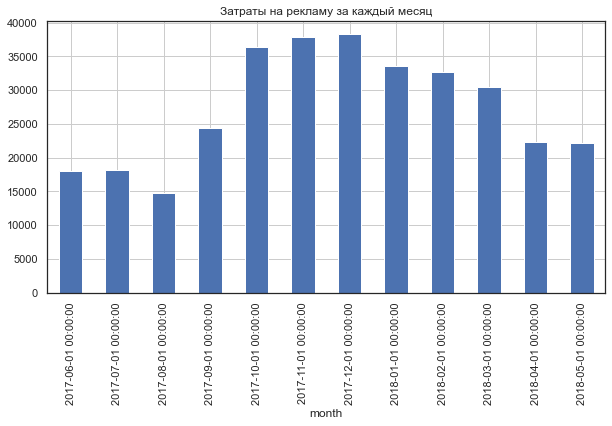

In [76]:
(costs.groupby('month')['costs'].sum()
           .plot(kind='bar', title='Затраты на рекламу за каждый месяц',
                 figsize=(10,5), grid=True)
)

##### Наибольшие маркетинговые затраты пришлись на октябрь -  36322.88, ноябрь - 37907.88, декабрь - 38315.35.

### •  Рассчитаем сколько стоило привлечение одного покупателя из каждого источника. 

In [77]:
# сгруппируем таблицу visits_log по пользователям
users = (visits_log.sort_values(by=['uid', 'start_ts'])
        .groupby('uid')
        .agg({'start_ts':'first', 'source_id':'first', 'device':'first'})
        .rename(columns={'start_ts':'acquisition_ts'}))

users.head()

,acquisition_ts,source_id,device
uid,,,
11863502262781,2018-03-01 17:27:00,3,touch
49537067089222,2018-02-06 15:55:00,2,touch
297729379853735,2017-06-07 18:47:00,3,desktop
313578113262317,2017-09-18 22:49:00,2,desktop
325320750514679,2017-09-30 14:29:00,5,desktop


In [78]:
# добавим столбец с датой посещения пользователя
users['acquisition_date'] = users['acquisition_ts'].dt.date

In [79]:
# добавим столбец с месяцем посещения пользователя
users['acquisition_month'] = users['acquisition_ts'].astype('datetime64[M]')

In [80]:
# переименуем индексы users
users = users.reset_index().set_index(['source_id', 'acquisition_date'])

In [81]:
#добавим колонку с затратами на маркетинг по источникам и дням из таблицы costs_log
users = users.join(costs_log
                   .rename(columns={'dt':'acquisition_date'}).set_index(['source_id', 'acquisition_date']), how = 'left')

In [82]:
#добавим стоимость приобритения индивидуального пользователя 
user_cost = (users.groupby(['source_id', 'acquisition_date'])
        .agg({'device':'count', 'costs':'max'})
        .rename(columns={'device':'users'}))

In [83]:
#посчитаем стоимость приобритения индивидуального пользователя
user_cost['acquisition_cost'] = user_cost['costs'] / user_cost['users']

In [84]:
# добавим к таблице user значения о стоимости затрат на рекламу на каждого пользователя.
users = users.join(user_cost[['acquisition_cost']], how = 'left')
# users

In [85]:
#сформируем профиль пользователя в таблице 
users = users.reset_index().set_index('uid')[['acquisition_ts','acquisition_date','acquisition_month',
                              'source_id','device', 'acquisition_cost']]
users

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.600000
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.600000
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.600000
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.600000
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.600000
...,...,...,...,...,...,...
17550479715346067160,2018-05-31 22:00:00,2018-05-31,2018-05-01,10,touch,0.177778
17715613363403416471,2018-05-31 03:30:00,2018-05-31,2018-05-01,10,desktop,0.177778
18076428844159112818,2018-05-31 17:47:00,2018-05-31,2018-05-01,10,touch,0.177778


In [86]:
# строим профиль платящих пользователей
paying_users = ((visits_log[visits_log['uid'].isin(orders_log['uid'].unique())]
                 .sort_values(by=['uid', 'start_ts']).groupby('uid')
                 .agg({'start_ts':'first', 'source_id':'first', 'device':'first'})
                 .rename(columns={'start_ts':'acquisition_ts'})))

In [87]:
# добавим столбец с датой посещения пользователя
paying_users['acquisition_date'] = paying_users['acquisition_ts'].dt.date

In [88]:
# добавим столбец с месяцем посещения пользователя
paying_users['acquisition_month'] = paying_users['acquisition_ts'].astype('datetime64[M]')

In [89]:
# переименуем индексы paying_users
paying_users = paying_users.reset_index().set_index(['source_id', 'acquisition_date'])


In [90]:
#добавим колонку с затратами на маркетинг по источникам и дням из таблицы costs_log
paying_users = (paying_users.join(costs_log
                                      .rename(columns={'dt':'acquisition_date'})
                                      .set_index(['source_id', 'acquisition_date']), how = 'left'))

In [91]:
#добавим стоимость приобритения индивидуального пользователя
user_cost = (paying_users.groupby(['source_id', 'acquisition_date'])
                  .agg({'device':'count', 'costs':'max'})
                  .rename(columns={'device':'users'}))

In [92]:
#посчитаем стоимость приобритения индивидуального пользователя
user_cost['payer_acquisition_cost'] = user_cost['costs'] / user_cost['users']

In [93]:
# добавим к таблице paying_users значения о стоимости затрат на рекламу на каждого пользователя.
paying_users = paying_users.join(user_cost[['payer_acquisition_cost']], how = 'left')

In [94]:
#сформируем профиль пользователя в таблице 
paying_users = paying_users.reset_index().set_index('uid')[['acquisition_ts','acquisition_date','acquisition_month',
                              'source_id','device', 'payer_acquisition_cost']]

In [95]:
print(paying_users.shape[0], len(orders['uid'].unique()), 
      paying_users['payer_acquisition_cost'].sum(), costs_log['costs'].sum())
paying_users.head()

36523 36523 327215.46 329131.62


,acquisition_ts,acquisition_date,acquisition_month,source_id,device,payer_acquisition_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,3.133333
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,3.133333
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,3.133333
2050423809815667474,2017-06-01 10:36:00,2017-06-01,2017-06-01,1,desktop,3.133333
3520273333047097992,2017-06-01 20:08:00,2017-06-01,2017-06-01,1,desktop,3.133333


In [96]:
# объединим пользователей с покупками и 
users = users.join(paying_users[['payer_acquisition_cost']], how='left')

In [97]:
users['payer'] = ~users['payer_acquisition_cost'].isna()
users.head()

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,payer_acquisition_cost,payer
uid,,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6,3.133333,True
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.6,NaN,False
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6,3.133333,True
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6,3.133333,True
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.6,NaN,False


In [98]:
# посчитаем стоимость привлечения пользователей по источникам рекламы
# оставим в профиле пользователеa с покупками
current_users = users.query('payer == True')
# скопируем затраты на этих пользователей из payer_acquisition_cost в acquisition_cost
current_users.head()

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,acquisition_cost,payer_acquisition_cost,payer
uid,,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.6,3.133333,True
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.6,3.133333,True
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.6,3.133333,True
2050423809815667474,2017-06-01 10:36:00,2017-06-01,2017-06-01,1,desktop,1.6,3.133333,True
3520273333047097992,2017-06-01 20:08:00,2017-06-01,2017-06-01,1,desktop,1.6,3.133333,True


In [99]:
current_users = current_users.drop(columns='acquisition_cost')


In [100]:
current_users['acquisition_cost'] = current_users['payer_acquisition_cost']
current_users.head()

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,payer_acquisition_cost,payer,acquisition_cost
uid,,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,3.133333,True,3.133333
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,3.133333,True,3.133333
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,3.133333,True,3.133333
2050423809815667474,2017-06-01 10:36:00,2017-06-01,2017-06-01,1,desktop,3.133333,True,3.133333
3520273333047097992,2017-06-01 20:08:00,2017-06-01,2017-06-01,1,desktop,3.133333,True,3.133333


In [101]:
# # построим когорты по источнику рекламы
# dimentions = ['source_id']
# cohorts_source_id = (current_users.groupby(dimentions)
#                          .agg({'payer':'count', 'acquisition_cost':'sum'}) # payer - количество пользователей
#                          .rename(columns={'payer':'cohort_size'}))
# cohorts_source_id

In [102]:
#построим когорты по источнику рекламы для всех уникальных пользователей из таблицы users
dimentions = ['source_id']
cohorts_source_id4 = (users.reset_index().groupby(dimentions)
                          .agg({'uid':'nunique', 'acquisition_cost':'sum'}) 
                          .rename(columns={'uid':'cohort_size'}))
cohorts_source_id4

,cohort_size,acquisition_cost
source_id,,
1,9469,20833.27
2,17616,42806.04
3,66116,141321.63
4,72346,61073.60
5,49237,51756.40
6,2,0.00
7,32,0.00
9,6448,5454.42
10,6903,5821.12


In [103]:
# проверка по стоимости затрат на привлечение пользователей.
costs_log.groupby('source_id').agg({'costs':'sum'})

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [104]:
# добавим в таблицу когорты стоимость привлечения пользователей
cohorts_source_id4['cac'] = (
    cohorts_source_id4['acquisition_cost'] / cohorts_source_id4['cohort_size'])
cohorts_source_id4

,cohort_size,acquisition_cost,cac
source_id,,,
1,9469,20833.27,2.200155
2,17616,42806.04,2.429952
3,66116,141321.63,2.137480
4,72346,61073.60,0.844188
5,49237,51756.40,1.051169
6,2,0.00,0.000000
7,32,0.00,0.000000
9,6448,5454.42,0.845909
10,6903,5821.12,0.843274


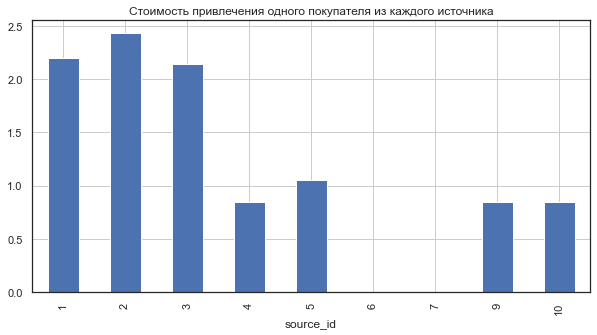

In [105]:
# построим график стоимости привлечения пользователей
(cohorts_source_id4['cac']
           .plot(kind='bar', title='Стоимость привлечения одного покупателя из каждого источника',
                 figsize=(10,5), grid=True)
)

Вывод: Дороже всего стоит привлечение пользователя из 2 рекламного источника - 2,42. На втором месте по стоимости источник №1 - 2,20, далее источник №3 - 2,13. Меньше всего и практически одинаково было потрачено на привлечение пользователей из источников №4, №9, №10 - 0,84. Источники №6 и №7 не были задействованы в рекламной работе.

### •  Рассчитаем на сколько окупились расходы (ROI). 

##### Для подсчета ROI и других метрик сформируем профиль пользователя users

In [106]:
# считаем LTV когорты по источникам рекламы
ltv_source_id = (orders_log.set_index('uid').rename(columns={'buy_ts':'purchase_month'})
        .join(users, how = 'left')[['acquisition_month','source_id','device', 'purchase_month', 'revenue']])
ltv_source_id['purchase_month'] = ltv_source_id['purchase_month'].astype('datetime64[M]')
ltv_source_id

,acquisition_month,source_id,device,purchase_month,revenue
uid,,,,,
9223707061355654945,2017-10-01,9,touch,2017-10-01,4.64
9224005701666002943,2017-12-01,5,desktop,2017-12-01,3.36
9224005701666002943,2017-12-01,5,desktop,2018-03-01,3.67
9225406053864431006,2017-09-01,4,desktop,2017-12-01,0.43
9225479525411867039,2018-02-01,4,touch,2018-02-01,7.33
...,...,...,...,...,...
9221059331469344216,2017-12-01,4,desktop,2017-12-01,0.98
9221809908447127809,2017-12-01,4,desktop,2017-12-01,1.34
9222179515197516675,2018-02-01,1,desktop,2018-02-01,2.20


In [107]:
# добавим возраст когорты равный 1 месяцу в таблицу
ltv_source_id['age_month'] = (
    ((ltv_source_id['purchase_month'] -  ltv_source_id['acquisition_month']) / np.timedelta64(1, 'M')).round().astype(int)
)
# ltv_source_id['age_month'].unique()

In [108]:
# сгруппируем когорту по источнику рекламы и возрасту когорты
ltv_source_id = ltv_source_id.groupby(dimentions + ['age_month']).agg({'revenue':'sum'})

In [109]:
# сгруппируем в сводной таблице прибыль на каждый источник для каждого возраста когорты.
ltv_source_id = pd.pivot_table(ltv_source_id, index=dimentions, columns='age_month', values='revenue', aggfunc='sum')
print(ltv_source_id.sum().sum(), orders_log['revenue'].sum())
ltv_source_id

252057.19999999946 252057.19999999998


age_month,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,14526.97,2613.99,1795.52,2734.87,1691.99,1114.23,934.40,2208.12,1252.73,869.44,823.63,524.66
2,17905.40,6059.01,6046.16,6497.13,3193.57,2474.25,1220.65,781.72,751.76,953.04,655.49,385.43
3,37710.74,5914.19,2474.90,2237.32,1988.45,1378.88,1072.33,579.89,513.36,295.13,196.17,149.88
4,37452.58,4456.89,2125.44,2080.92,1763.52,2149.30,2080.58,714.13,950.28,1366.02,794.77,762.40
5,28782.52,3422.46,2015.11,10872.91,1756.89,2154.24,1152.34,925.30,543.22,783.15,135.06,80.82
7,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2374.56,631.02,572.04,508.61,456.79,226.14,277.07,199.49,276.01,163.92,58.23,15.52
10,3554.47,302.85,127.29,76.72,172.14,80.42,71.58,25.97,4.28,17.69,7.82,9.10


In [110]:
# посчитаем накопительную прибыль в каждом возрасте методом cumsum()
ltv_source_id = ltv_source_id.cumsum(axis = 1)
# ltv_source_id

In [111]:
ltv_source_id

age_month,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,14526.97,17140.96,18936.48,21671.35,23363.34,24477.57,25411.97,27620.09,28872.82,29742.26,30565.89,31090.55
2,17905.40,23964.41,30010.57,36507.70,39701.27,42175.52,43396.17,44177.89,44929.65,45882.69,46538.18,46923.61
3,37710.74,43624.93,46099.83,48337.15,50325.60,51704.48,52776.81,53356.70,53870.06,54165.19,54361.36,54511.24
4,37452.58,41909.47,44034.91,46115.83,47879.35,50028.65,52109.23,52823.36,53773.64,55139.66,55934.43,56696.83
5,28782.52,32204.98,34220.09,45093.00,46849.89,49004.13,50156.47,51081.77,51624.99,52408.14,52543.20,52624.02
7,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2374.56,3005.58,3577.62,4086.23,4543.02,4769.16,5046.23,5245.72,5521.73,5685.65,5743.88,5759.40
10,3554.47,3857.32,3984.61,4061.33,4233.47,4313.89,4385.47,4411.44,4415.72,4433.41,4441.23,4450.33


In [112]:
# добавим в сводную таблицу с прибылью количество пользователей по каждому источнику рекламы.
ltv_source_id = cohorts_source_id4[['cohort_size']].join(ltv_source_id)

In [113]:
ltv_source_id

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,,
1,9469,14526.97,17140.96,18936.48,21671.35,23363.34,24477.57,25411.97,27620.09,28872.82,29742.26,30565.89,31090.55
2,17616,17905.40,23964.41,30010.57,36507.70,39701.27,42175.52,43396.17,44177.89,44929.65,45882.69,46538.18,46923.61
3,66116,37710.74,43624.93,46099.83,48337.15,50325.60,51704.48,52776.81,53356.70,53870.06,54165.19,54361.36,54511.24
4,72346,37452.58,41909.47,44034.91,46115.83,47879.35,50028.65,52109.23,52823.36,53773.64,55139.66,55934.43,56696.83
5,49237,28782.52,32204.98,34220.09,45093.00,46849.89,49004.13,50156.47,51081.77,51624.99,52408.14,52543.20,52624.02
6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,32,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6448,2374.56,3005.58,3577.62,4086.23,4543.02,4769.16,5046.23,5245.72,5521.73,5685.65,5743.88,5759.40
10,6903,3554.47,3857.32,3984.61,4061.33,4233.47,4313.89,4385.47,4411.44,4415.72,4433.41,4441.23,4450.33


In [114]:
# делим все ячейки в рядах на соотв-ю когорту для получения накопительного значения LTV на одного пользователя.
ltv_source_id = ltv_source_id.div(ltv_source_id['cohort_size'], axis = 0).drop(columns=['cohort_size'])
ltv_source_id

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,1.534161,1.810219,1.999839,2.288663,2.467350,2.585022,2.683702,2.916896,3.049194,3.141014,3.227996,3.283404
2,1.016428,1.360377,1.703597,2.072417,2.253705,2.394160,2.463452,2.507828,2.550502,2.604603,2.641813,2.663693
3,0.570372,0.659824,0.697257,0.731096,0.761171,0.782027,0.798246,0.807016,0.814781,0.819245,0.822212,0.824479
4,0.517687,0.579292,0.608671,0.637434,0.661811,0.691519,0.720278,0.730149,0.743284,0.762166,0.773152,0.783690
5,0.584571,0.654081,0.695008,0.915836,0.951518,0.995270,1.018674,1.037467,1.048500,1.064406,1.067149,1.068790
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.038125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.368263,0.466126,0.554842,0.633721,0.704563,0.739634,0.782604,0.813542,0.856348,0.881770,0.890800,0.893207
10,0.514917,0.558789,0.577229,0.588343,0.613280,0.624930,0.635299,0.639061,0.639681,0.642244,0.643377,0.644695


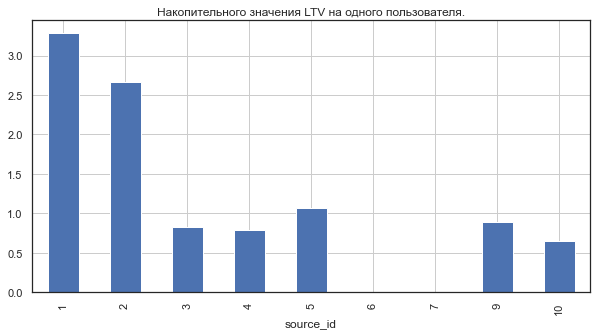

In [115]:
# построим график стоимости привлечения одного пользователя из разных источников рекламы
(ltv_source_id[11]
           .plot(kind='bar', title='Накопительного значения LTV на одного пользователя.',
                 figsize=(10,5), grid=True)
)

#### Прибыль с 1 пользователя наибольшая у когорты из источника рекламы №1 - 3.28. На втором месте когорта с источником рекламы №2 - 2,66. На третьем №5 - 1,06

In [116]:
# для подсчета значения окупаемости ROI объединим таблицы cohorts_source_id и roi_soursed_id методом join
roi_soursed_id = cohorts_source_id4[['cohort_size', 'cac']].join(ltv_source_id)
roi_soursed_id

,cohort_size,cac,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,,,
1,9469,2.200155,1.534161,1.810219,1.999839,2.288663,2.467350,2.585022,2.683702,2.916896,3.049194,3.141014,3.227996,3.283404
2,17616,2.429952,1.016428,1.360377,1.703597,2.072417,2.253705,2.394160,2.463452,2.507828,2.550502,2.604603,2.641813,2.663693
3,66116,2.137480,0.570372,0.659824,0.697257,0.731096,0.761171,0.782027,0.798246,0.807016,0.814781,0.819245,0.822212,0.824479
4,72346,0.844188,0.517687,0.579292,0.608671,0.637434,0.661811,0.691519,0.720278,0.730149,0.743284,0.762166,0.773152,0.783690
5,49237,1.051169,0.584571,0.654081,0.695008,0.915836,0.951518,0.995270,1.018674,1.037467,1.048500,1.064406,1.067149,1.068790
6,2,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,32,0.000000,0.038125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6448,0.845909,0.368263,0.466126,0.554842,0.633721,0.704563,0.739634,0.782604,0.813542,0.856348,0.881770,0.890800,0.893207
10,6903,0.843274,0.514917,0.558789,0.577229,0.588343,0.613280,0.624930,0.635299,0.639061,0.639681,0.642244,0.643377,0.644695


In [117]:
# считаем окупаемость разделив LTV на CAC
roi_soursed_id = roi_soursed_id.div(roi_soursed_id['cac'], axis=0).round(2).drop(columns=['cohort_size','cac'])

In [118]:
roi_soursed_id

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.70,0.82,0.91,1.04,1.12,1.17,1.22,1.33,1.39,1.43,1.47,1.49
2,0.42,0.56,0.70,0.85,0.93,0.99,1.01,1.03,1.05,1.07,1.09,1.10
3,0.27,0.31,0.33,0.34,0.36,0.37,0.37,0.38,0.38,0.38,0.38,0.39
4,0.61,0.69,0.72,0.76,0.78,0.82,0.85,0.86,0.88,0.90,0.92,0.93
5,0.56,0.62,0.66,0.87,0.91,0.95,0.97,0.99,1.00,1.01,1.02,1.02
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.44,0.55,0.66,0.75,0.83,0.87,0.93,0.96,1.01,1.04,1.05,1.06
10,0.61,0.66,0.68,0.70,0.73,0.74,0.75,0.76,0.76,0.76,0.76,0.76


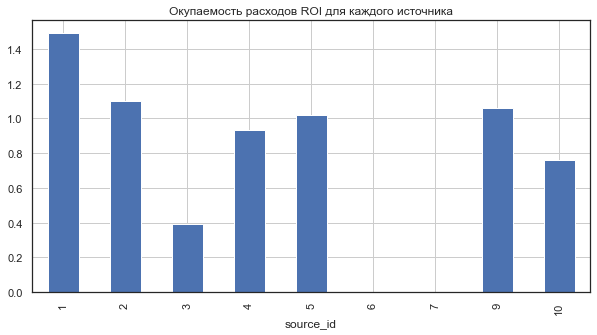

In [119]:
# строим график окупаемости
(roi_soursed_id[11].plot(kind='bar', title='Окупаемость расходов ROI для каждого источника',
                 figsize=(10,5), grid=True)
)

#### Расходы по источникам рекламы за 12 месяцев окупились у источников №1 на 1,49, №2 на 1,10, №5 на 1,02, №9 на 1,06, №5 на 1,02. Наиболее эффективен по окупаемости оказался источник №1. Он окупается уже на 4-й месяц жизни.  Данный источник по количеству пользователей весьма незначителен, было привлечено 9469 пользователей. Рекомендуется увеличить использование данного источника для привлечения пользователей. Источник №2,  окупился на 7 месяце жизни и через него также привлечено незначительное количество пользователей 17616. 
Так же окупаемыми стали источник №5 и №9 на 9-й месяц жизни когорты. 
Самым неэффективным источником рекламы оказался источник №3. При этом он является одним из основных каналов привлечения пользователей, было привлечено 66116 пользователей, совершивших покупки. Рекомендуется уменьшить использование источника №3. 

### •  Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?


#### 1) Оценка пользовательской активности по месяцам для разных устройств.

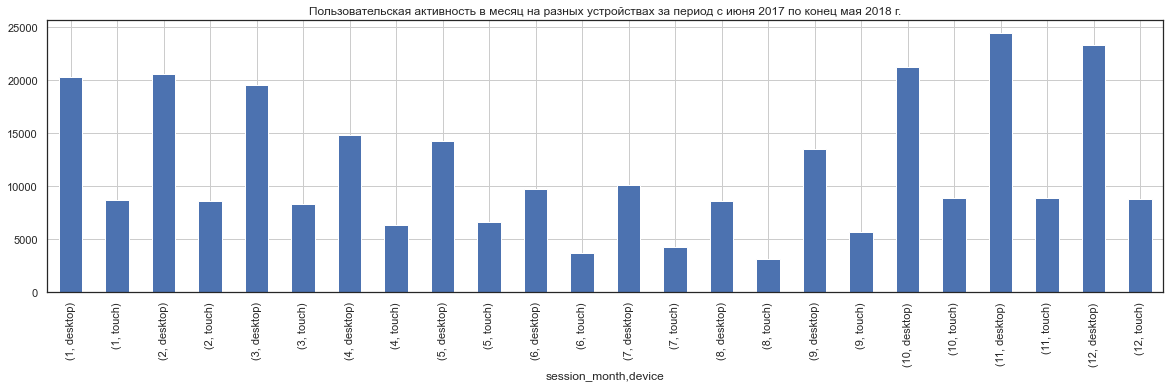

In [120]:
# построим график MAU для пользователей разных устройств.
(activity_users.groupby(['session_month', 'device'])['uid'].nunique()
           .plot(kind='bar', title='Пользовательская активность в месяц на разных устройствах за период с июня 2017 по конец мая 2018 г.',
                 figsize=(20,5), grid=True))

#### Большинство пользователей предпочитают заходить в приложение с настольного компьютера. Активность пользователей в октябре, ноябре и декабре увеличивается на всех устройствах.

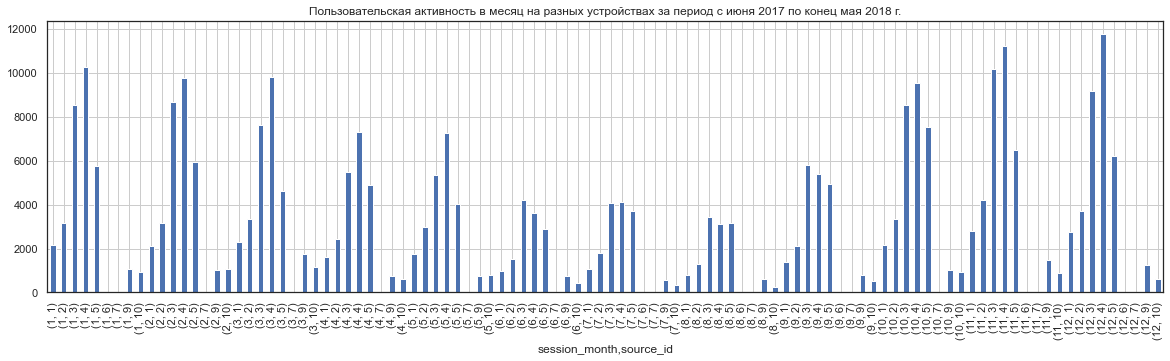

In [121]:
# построим график MAU для пользователей приходящих из разных рекламных источников.
(activity_users.groupby(['session_month', 'source_id'])['uid'].nunique()
           .plot(kind='bar', title='Пользовательская активность в месяц на разных устройствах за период с июня 2017 по конец мая 2018 г.',
                 figsize=(20,5), grid=True))

#### Наибольшее количество пользователей приходит из источника №4 и №3.

#### 2) Оценка количества сессий на 1 пользователя по месяцам для разных устройств.

In [122]:
# посчитаем сколько сессий приходится на 1 пользователя в месяц для разных устройств.
sessions_month_per_user_device = activity_users.groupby(['session_month', 'device']).agg({'uid': ['count','nunique']})
sessions_month_per_user_device.columns = ['n_sessions', 'n_users']
sessions_month_per_user_device['sessions_per_user'] = sessions_month_per_user_device['n_sessions'] / sessions_month_per_user_device['n_users']
sessions_month_per_user_device.reset_index().head()

,session_month,device,n_sessions,n_users,sessions_per_user
0,1,desktop,26577,20350,1.305995
1,1,touch,10362,8741,1.185448
2,2,desktop,27077,20574,1.316079
3,2,touch,10105,8590,1.176368
4,3,desktop,25861,19574,1.321191


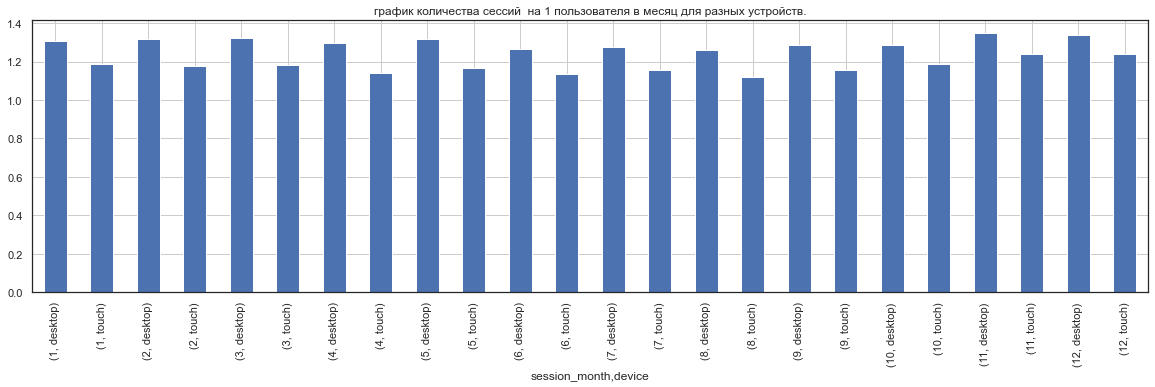

In [123]:
# построим график количества сессий  на 1 пользователя в месяц для разных устройств.
(sessions_month_per_user_device.groupby(['session_month', 'device'])['sessions_per_user'].first()
           .plot(kind='bar', title='график количества сессий  на 1 пользователя в месяц для разных устройств.',
                 figsize=(20,5), grid=True))

#### Пользователи чаще повторно заходят с настольного компьютера, в среднем 1,3 сессии в месяц. С сенсорного устройства пользователи совершают 1,18 сесий в месяц

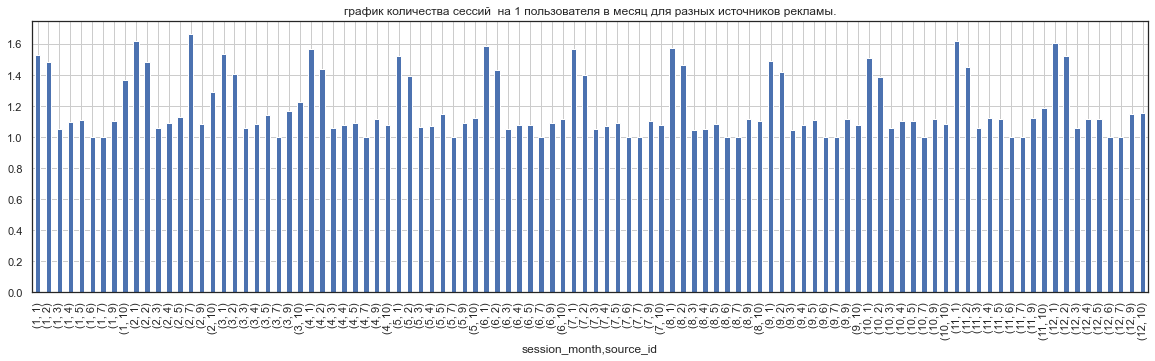

In [124]:
# посчитаем сколько сессий приходится на 1 пользователя в месяц для разных источников рекламы.
sessions_month_per_user_source_id = activity_users.groupby(['session_month', 'source_id']).agg({'uid': ['count','nunique']})
sessions_month_per_user_source_id.columns = ['n_sessions', 'n_users']
sessions_month_per_user_source_id['sessions_per_user'] = sessions_month_per_user_source_id['n_sessions'] / sessions_month_per_user_source_id['n_users']
sessions_month_per_user_source_id.reset_index().head()
# построим график количества сессий  на 1 пользователя в месяц для разных источников рекламы.
(sessions_month_per_user_source_id.groupby(['session_month', 'source_id'])['sessions_per_user'].first()
           .plot(kind='bar', title='график количества сессий  на 1 пользователя в месяц для разных источников рекламы.',
                 figsize=(20,5), grid=True))

#### Чаще всего пользователи повторно совершают сессии из источника №1 и №2.

#### 3)  Определим метрику Retention Rate, что бы узнать как часто люди возвращаются при использовании разных устройств и источников.

In [125]:
# сформируем когорту по first_activity_month и девайс и lifetime.
cohorts_device_lifetime = activity_users.groupby(['first_activity_month', 'device','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [126]:
# Найдём исходное количество пользователей в когорте. Возьмём их число на нулевую неделю:
initial_users_device = (
    cohorts_device_lifetime[cohorts_device_lifetime['cohort_lifetime'] == 0][['first_activity_month', 'device', 'uid']]
    .rename(columns={'uid':'cohort_users'}))

In [127]:
#Объединим данные по когортам с исходным количеством пользователей в когорте методом merge()
cohorts_device_lifetime = cohorts_device_lifetime.merge(initial_users_device, on=('first_activity_month', 'device'))

In [128]:
#  рассчитаем Retention Rate. 
#Разделим количество активных пользователей в каждый месяц на исходное число пользователей в когорте.
cohorts_device_lifetime['retention'] = cohorts_device_lifetime['uid']/cohorts_device_lifetime['cohort_users']
cohorts_device_lifetime

,first_activity_month,device,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,desktop,0,9761,9761,1.000000
1,2017-06-01,desktop,1,833,9761,0.085340
2,2017-06-01,desktop,2,593,9761,0.060752
3,2017-06-01,desktop,3,671,9761,0.068743
4,2017-06-01,desktop,4,741,9761,0.075914
...,...,...,...,...,...,...
151,2018-04-01,desktop,1,553,10837,0.051029
152,2018-04-01,touch,0,4991,4991,1.000000
153,2018-04-01,touch,1,220,4991,0.044079
154,2018-05-01,desktop,0,10252,10252,1.000000


In [129]:
# Построим сводную таблицу и создадим отчет:
retention_device_lifetime_pivot = cohorts_device_lifetime.pivot_table(index=('first_activity_month','device'),
                                                     columns='cohort_lifetime',
                                                     values='retention',aggfunc='sum')

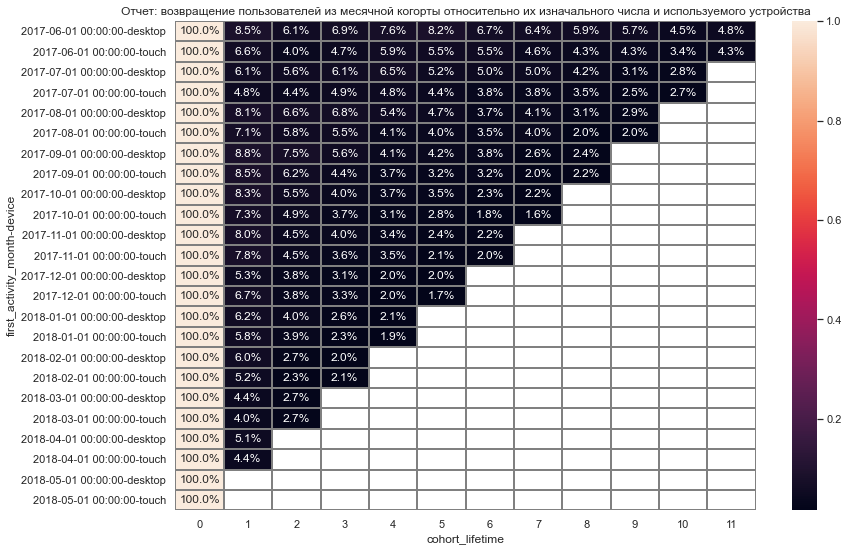

In [130]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Отчет: возвращение пользователей из месячной когорты относительно их изначального числа и используемого устройства')
sns.heatmap(retention_device_lifetime_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

#### Процент возвращения пользователей больше у настольных компьютеров.

In [131]:
# сформируем когорту по cohorts_source_id_lifetime по первому месяцу использования, источнику и lifetime.
cohorts_source_id_lifetime = (
    activity_users.groupby(['first_activity_month', 'source_id','cohort_lifetime']).agg({'uid':'nunique'}).reset_index())

In [132]:
# Найдём исходное количество пользователей в когорте. Возьмём их число на нулевую неделю:
initial_users_source_id = (
    cohorts_source_id_lifetime[cohorts_source_id_lifetime['cohort_lifetime'] == 0][['first_activity_month', 'source_id', 'uid']]
    .rename(columns={'uid':'cohort_users'}))

In [133]:
#Объединим данные по когортам с исходным количеством пользователей в когорте методом merge()
cohorts_source_id_lifetime = cohorts_source_id_lifetime.merge(initial_users_source_id, on=('first_activity_month', 'source_id'))

In [134]:
#  рассчитаем Retention Rate. 
#Разделим количество активных пользователей в каждый месяц на исходное число пользователей в когорте.
cohorts_source_id_lifetime['retention'] = cohorts_source_id_lifetime['uid']/cohorts_source_id_lifetime['cohort_users']
# cohorts_device_lifetime
# Построим сводную таблицу и создадим отчет:
retention_source_id_lifetime_pivot = cohorts_source_id_lifetime.pivot_table(index=('first_activity_month','source_id'),
                                                     columns='cohort_lifetime',
                                                     values='retention',aggfunc='sum')

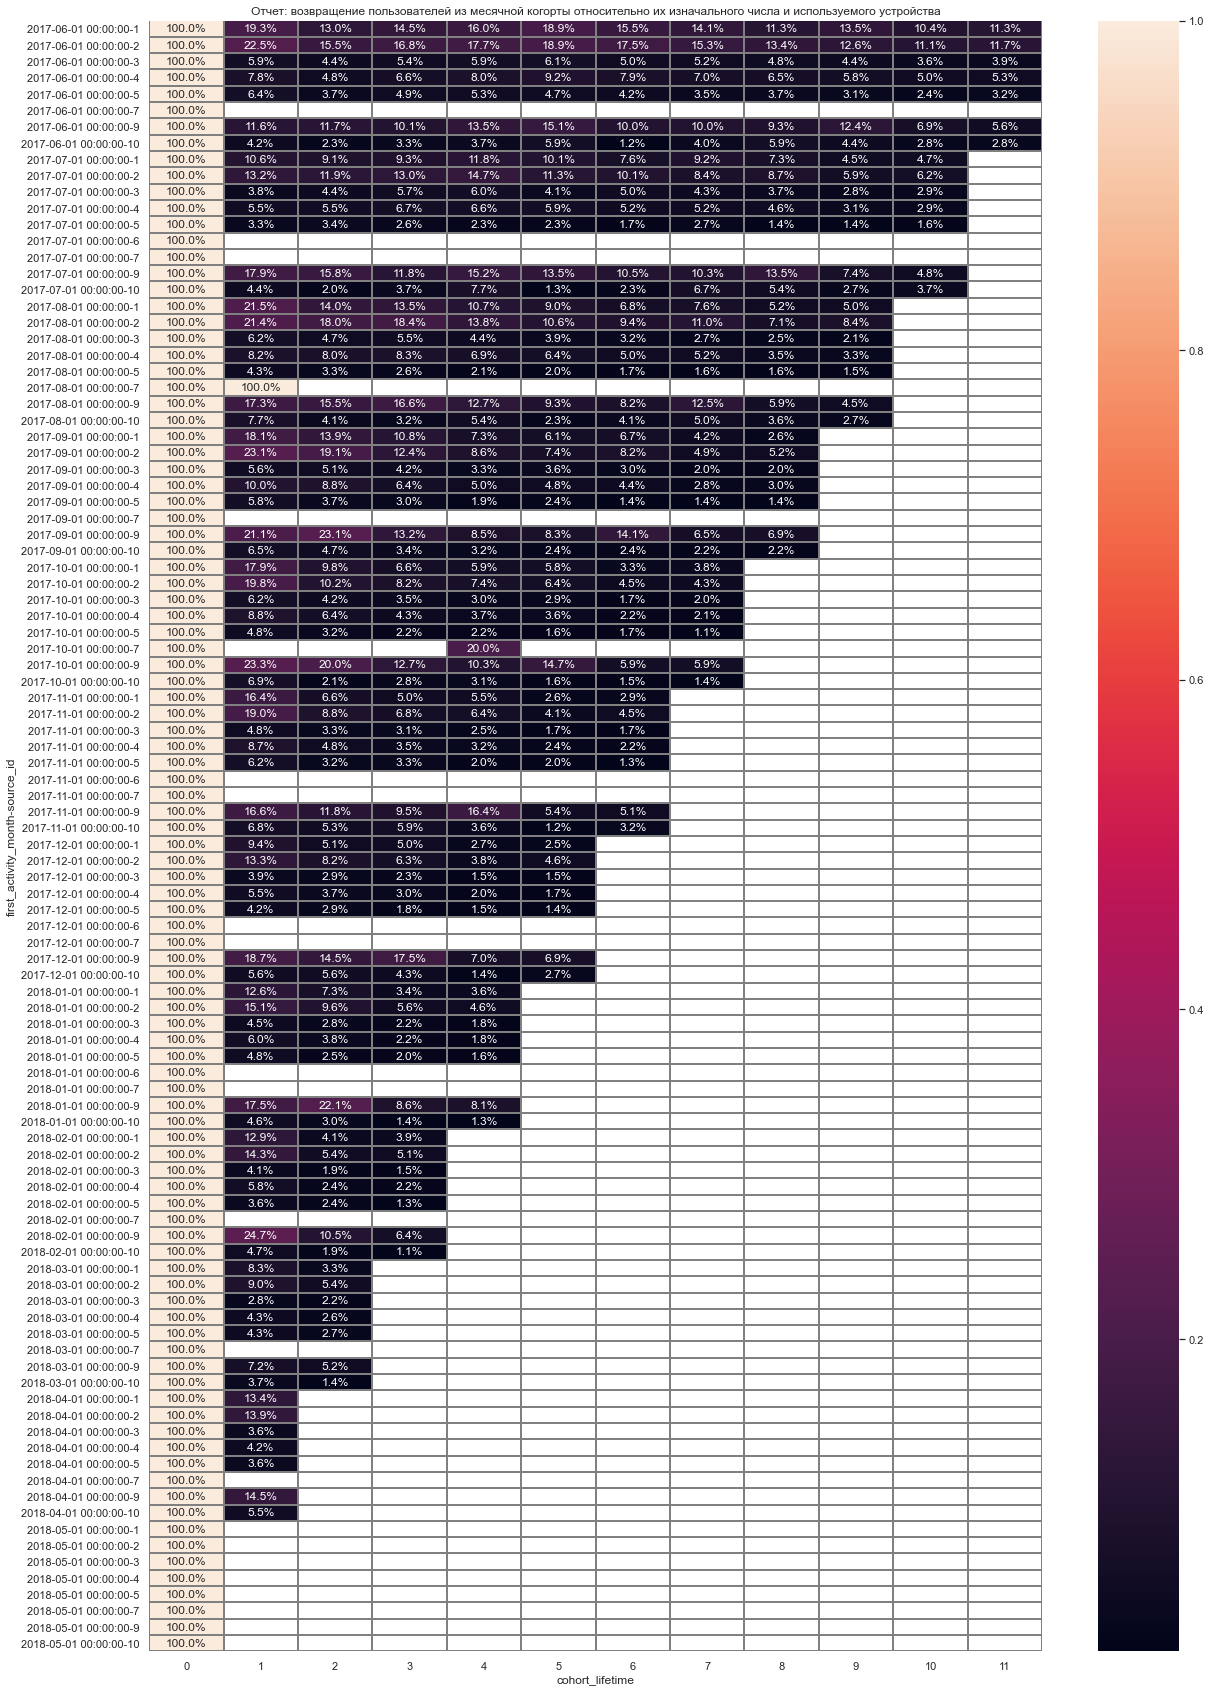

In [135]:
sns.set(style='white')
plt.figure(figsize=(20, 30))
plt.title('Отчет: возвращение пользователей из месячной когорты относительно их изначального числа и используемого устройства')
sns.heatmap(retention_source_id_lifetime_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

#### Процент возвращения пользователей больше у источников №1 и №2.

#### 4)  Определим метрики CAC, LTV и ROI для разных устройств.

In [136]:
current_users

,acquisition_ts,acquisition_date,acquisition_month,source_id,device,payer_acquisition_cost,payer,acquisition_cost
uid,,,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,3.133333,True,3.133333
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,3.133333,True,3.133333
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,3.133333,True,3.133333
2050423809815667474,2017-06-01 10:36:00,2017-06-01,2017-06-01,1,desktop,3.133333,True,3.133333
3520273333047097992,2017-06-01 20:08:00,2017-06-01,2017-06-01,1,desktop,3.133333,True,3.133333
...,...,...,...,...,...,...,...,...
14129427635584867187,2018-05-31 20:30:00,2018-05-31,2018-05-01,10,touch,0.704000,True,0.704000
14350420740207733259,2018-05-31 10:15:00,2018-05-31,2018-05-01,10,desktop,0.704000,True,0.704000
15116668155510764243,2018-05-31 22:47:00,2018-05-31,2018-05-01,10,desktop,0.704000,True,0.704000


In [137]:
# рассчитаем когорты по источнику рекламы
# current_users - срез профиля пользователя по таблице users для пользователей совершавших покупки.
dimentions = ['device']
cohorts_device = (users.reset_index().groupby(dimentions)
                         .agg({'uid':'nunique', 'acquisition_cost':'sum'})
                         .rename(columns={'uid':'cohort_size'}))
cohorts_device

,cohort_size,acquisition_cost
device,,
desktop,160795,235065.750929
touch,67374,94000.729071


In [138]:
# добавим в таблицу когорты стоимость привлечения пользователей
cohorts_device['cac'] = (
    cohorts_device['acquisition_cost'] / cohorts_device['cohort_size'])
cohorts_device

,cohort_size,acquisition_cost,cac
device,,,
desktop,160795,235065.750929,1.461897
touch,67374,94000.729071,1.395208


In [139]:
# считаем LTV когорты по устройствам 
ltv_device = (orders_log.set_index('uid').rename(columns={'buy_ts':'purchase_month'})
        .join(users, how = 'left')[['acquisition_month','source_id','device', 'purchase_month', 'revenue']])
ltv_device['purchase_month'] = ltv_device['purchase_month'].astype('datetime64[M]')
ltv_device

,acquisition_month,source_id,device,purchase_month,revenue
uid,,,,,
9223707061355654945,2017-10-01,9,touch,2017-10-01,4.64
9224005701666002943,2017-12-01,5,desktop,2017-12-01,3.36
9224005701666002943,2017-12-01,5,desktop,2018-03-01,3.67
9225406053864431006,2017-09-01,4,desktop,2017-12-01,0.43
9225479525411867039,2018-02-01,4,touch,2018-02-01,7.33
...,...,...,...,...,...
9221059331469344216,2017-12-01,4,desktop,2017-12-01,0.98
9221809908447127809,2017-12-01,4,desktop,2017-12-01,1.34
9222179515197516675,2018-02-01,1,desktop,2018-02-01,2.20


In [140]:
# добавим возраст когорты равный 1 месяцу в таблицу
ltv_device['age_month'] = (
    ((ltv_device['purchase_month'] -  ltv_device['acquisition_month']) / np.timedelta64(1, 'M')).round().astype(int)
)
ltv_device

,acquisition_month,source_id,device,purchase_month,revenue,age_month
uid,,,,,,
9223707061355654945,2017-10-01,9,touch,2017-10-01,4.64,0
9224005701666002943,2017-12-01,5,desktop,2017-12-01,3.36,0
9224005701666002943,2017-12-01,5,desktop,2018-03-01,3.67,3
9225406053864431006,2017-09-01,4,desktop,2017-12-01,0.43,3
9225479525411867039,2018-02-01,4,touch,2018-02-01,7.33,0
...,...,...,...,...,...,...
9221059331469344216,2017-12-01,4,desktop,2017-12-01,0.98,0
9221809908447127809,2017-12-01,4,desktop,2017-12-01,1.34,0
9222179515197516675,2018-02-01,1,desktop,2018-02-01,2.20,0


In [141]:
# ltv_source_id['age_month'].unique()
# сгруппируем когорту по устройствам и возрасту когорты
ltv_device = ltv_device.groupby(dimentions + ['age_month']).agg({'revenue':'sum'})
#ltv_device

In [142]:
# сгруппируем в сводной таблице прибыль по устройствам для каждого возраста когорты.
ltv_device = ltv_device.pivot_table(index=dimentions, columns='age_month', values='revenue', aggfunc='sum')
# посчитаем накопительную прибыль в каждом возрасте методом cumsum()
# ltv

In [143]:
ltv_device

age_month,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,117165.49,18442.39,13011.79,23398.22,9767.11,8385.28,5949.24,4255.13,3330.05,3540.78,2386.19,1698.10
touch,25142.97,4958.02,2144.67,1610.26,1256.24,1192.18,859.71,1179.49,961.59,907.61,284.98,229.71


In [144]:
# посчитаем накопительную прибыль в каждом возрасте методом cumsum()
ltv_device = ltv_device.cumsum(axis = 1)
ltv_device

age_month,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,117165.49,135607.88,148619.67,172017.89,181785.00,190170.28,196119.52,200374.65,203704.70,207245.48,209631.67,211329.77
touch,25142.97,30100.99,32245.66,33855.92,35112.16,36304.34,37164.05,38343.54,39305.13,40212.74,40497.72,40727.43


In [145]:
# добавим в сводную таблицу с прибылью количество пользователей
ltv_device = cohorts_device[['cohort_size']].join(ltv_device)
ltv_device

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,,
desktop,160795,117165.49,135607.88,148619.67,172017.89,181785.00,190170.28,196119.52,200374.65,203704.70,207245.48,209631.67,211329.77
touch,67374,25142.97,30100.99,32245.66,33855.92,35112.16,36304.34,37164.05,38343.54,39305.13,40212.74,40497.72,40727.43


In [146]:
# делим все ячейки в рядах на размер соотв-й когорты для получения накопительного значения LTV на одного пользователя.
ltv_device = ltv_device.div(ltv_device['cohort_size'], axis = 0).drop(columns=['cohort_size'])
ltv_device

,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,0.728664,0.843359,0.924280,1.069796,1.130539,1.182688,1.219687,1.246150,1.266860,1.288880,1.303720,1.314281
touch,0.373185,0.446775,0.478607,0.502507,0.521153,0.538848,0.551608,0.569115,0.583387,0.596858,0.601088,0.604498


In [147]:
# для подсчета значения окупаемости ROI объединим таблицы cohorts_source_id и roi_soursed_id методом join
roi_device = cohorts_device[['cohort_size', 'cac']].join(ltv_device)
roi_device

,cohort_size,cac,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,,,
desktop,160795,1.461897,0.728664,0.843359,0.924280,1.069796,1.130539,1.182688,1.219687,1.246150,1.266860,1.288880,1.303720,1.314281
touch,67374,1.395208,0.373185,0.446775,0.478607,0.502507,0.521153,0.538848,0.551608,0.569115,0.583387,0.596858,0.601088,0.604498


In [148]:
roi_device = roi_device.div(roi_device['cac'], axis=0).round(2).drop(columns=['cohort_size','cac'])
roi_device

,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,0.50,0.58,0.63,0.73,0.77,0.81,0.83,0.85,0.87,0.88,0.89,0.90
touch,0.27,0.32,0.34,0.36,0.37,0.39,0.40,0.41,0.42,0.43,0.43,0.43


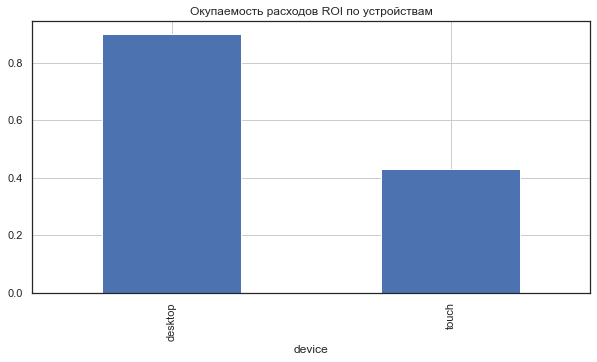

In [149]:
# построим график
(roi_device[11].plot(kind='bar', title='Окупаемость расходов ROI по устройствам',
                 figsize=(10,5), grid=True))

За 12 месяцев когорты при разбиении по устройствам не окупились.

#### 5)  Определим метрики CAC, LTV и ROI по месячным когортам .

In [150]:
dimentions = ['acquisition_month']
cohorts_month = (users.reset_index().groupby(dimentions)
                         .agg({'uid':'nunique', 'acquisition_cost':'sum'})
                         .rename(columns={'uid':'cohort_size'}))
# добавим в таблицу когорты стоимость привлечения пользователей
cohorts_month['cac'] = (
    cohorts_month['acquisition_cost'] / cohorts_month['cohort_size'])
# считаем LTV когорты по источникам рекламы


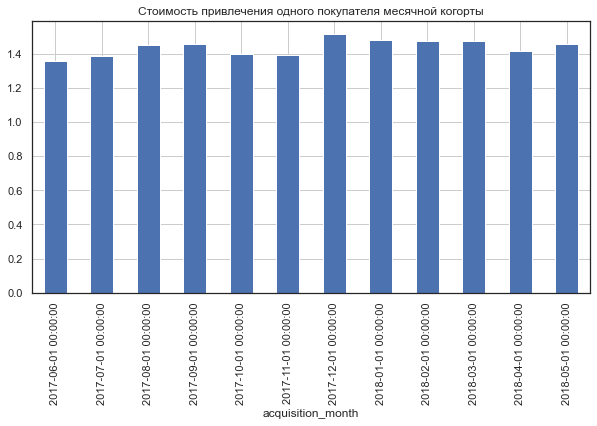

In [151]:
# построим график стоимости привлечения пользователей
(cohorts_month['cac']
           .plot(kind='bar', title='Стоимость привлечения одного покупателя месячной когорты',
                 figsize=(10,5), grid=True)
)

In [152]:
ltv_month = (orders_log.set_index('uid').rename(columns={'buy_ts':'purchase_month'})
        .join(users, how = 'left')[['acquisition_month','source_id','device', 'purchase_month', 'revenue']])
ltv_month['purchase_month'] = ltv_month['purchase_month'].astype('datetime64[M]')
# ltv
# добавим возраст когорты равный 1 месяцу в таблицу
ltv_month['age_month'] = (
    ((ltv_month['purchase_month'] -  ltv_month['acquisition_month']) / np.timedelta64(1, 'M')).round().astype(int)
)
# ltv_source_id['age_month'].unique()
# сгруппируем когорту по dimentions и возрасту когорты
ltv_month = ltv_month.groupby(dimentions + ['age_month']).agg({'revenue':'sum'})
# сгруппируем в сводной таблице прибыль на каждый источник для каждого возраста когорты.
ltv_month = ltv_month.pivot_table(index=dimentions, columns='age_month', values='revenue', aggfunc='sum')
ltv_month

age_month,0,1,2,3,4,5,6,7,8,9,10,11
acquisition_month,,,,,,,,,,,,
2017-06-01,9557.49,2664.58,1464.69,3882.09,3940.59,2824.48,3489.95,2270.81,2317.91,3481.64,2204.01,1927.81
2017-07-01,9874.89,1059.28,1108.90,982.96,846.99,798.08,588.00,770.30,724.52,591.03,467.16,NaN
2017-08-01,6234.81,997.32,1001.35,946.21,810.04,532.90,486.65,1246.23,830.64,375.72,NaN,NaN
2017-09-01,12357.20,3700.48,2110.63,10438.93,1288.48,1910.05,966.84,491.38,418.57,NaN,NaN,NaN
2017-10-01,18362.32,3809.83,1327.02,1058.05,1043.47,1022.19,578.91,655.90,NaN,NaN,NaN,NaN
2017-11-01,16531.79,2667.58,1342.85,1369.53,1108.74,707.63,698.60,NaN,NaN,NaN,NaN,NaN
2017-12-01,16857.00,1739.03,4198.30,5123.82,1457.57,1782.13,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,10597.01,1951.70,1164.76,305.88,527.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,11512.63,1984.46,663.19,901.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# посчитаем накопительную прибыль в каждом возрасте методом cumsum()
ltv_month = ltv_month.cumsum(axis = 1)
ltv_month

age_month,0,1,2,3,4,5,6,7,8,9,10,11
acquisition_month,,,,,,,,,,,,
2017-06-01,9557.49,12222.07,13686.76,17568.85,21509.44,24333.92,27823.87,30094.68,32412.59,35894.23,38098.24,40026.05
2017-07-01,9874.89,10934.17,12043.07,13026.03,13873.02,14671.10,15259.10,16029.40,16753.92,17344.95,17812.11,NaN
2017-08-01,6234.81,7232.13,8233.48,9179.69,9989.73,10522.63,11009.28,12255.51,13086.15,13461.87,NaN,NaN
2017-09-01,12357.20,16057.68,18168.31,28607.24,29895.72,31805.77,32772.61,33263.99,33682.56,NaN,NaN,NaN
2017-10-01,18362.32,22172.15,23499.17,24557.22,25600.69,26622.88,27201.79,27857.69,NaN,NaN,NaN,NaN
2017-11-01,16531.79,19199.37,20542.22,21911.75,23020.49,23728.12,24426.72,NaN,NaN,NaN,NaN,NaN
2017-12-01,16857.00,18596.03,22794.33,27918.15,29375.72,31157.85,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,10597.01,12548.71,13713.47,14019.35,14546.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,11512.63,13497.09,14160.28,15061.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
# добавим в сводную таблицу с прибылью количество пользователей
ltv_month = cohorts_month[['cohort_size']].join(ltv_month)
# ltv_source_id
# делим все ячейки в рядах на соотв-ю когорту для получения накопительного значения LTV на одного пользователя.
ltv_month = ltv_month.div(ltv_month['cohort_size'], axis = 0).drop(columns=['cohort_size'])
# ltv_source_id
# для подсчета значения окупаемости ROI объединим таблицы cohorts_source_id и roi_soursed_id методом join
roi_month = cohorts_month[['cohort_size', 'cac']].join(ltv_month)
roi_month = roi_month.div(roi_month['cac'], axis=0).round(2).drop(columns=['cohort_size','cac'])
roi_month.fillna('')

,0,1,2,3,4,5,6,7,8,9,10,11
acquisition_month,,,,,,,,,,,,
2017-06-01,0.53,0.68,0.76,0.98,1.19,1.35,1.54,1.67,1.8,1.99,2.11,2.22
2017-07-01,0.54,0.60,0.66,0.71,0.76,0.8,0.84,0.88,0.92,0.95,0.98,
2017-08-01,0.42,0.49,0.56,0.62,0.68,0.71,0.74,0.83,0.88,0.91,,
2017-09-01,0.51,0.66,0.75,1.17,1.23,1.31,1.35,1.37,1.38,,,
2017-10-01,0.51,0.61,0.65,0.68,0.7,0.73,0.75,0.77,,,,
2017-11-01,0.44,0.51,0.54,0.58,0.61,0.63,0.64,,,,,
2017-12-01,0.44,0.49,0.6,0.73,0.77,0.81,,,,,,
2018-01-01,0.32,0.37,0.41,0.42,0.43,,,,,,,
2018-02-01,0.35,0.41,0.43,0.46,,,,,,,,


In [155]:
roi_month[range(0, 6)].fillna('')

,0,1,2,3,4,5
acquisition_month,,,,,,
2017-06-01,0.53,0.68,0.76,0.98,1.19,1.35
2017-07-01,0.54,0.60,0.66,0.71,0.76,0.8
2017-08-01,0.42,0.49,0.56,0.62,0.68,0.71
2017-09-01,0.51,0.66,0.75,1.17,1.23,1.31
2017-10-01,0.51,0.61,0.65,0.68,0.7,0.73
2017-11-01,0.44,0.51,0.54,0.58,0.61,0.63
2017-12-01,0.44,0.49,0.6,0.73,0.77,0.81
2018-01-01,0.32,0.37,0.41,0.42,0.43,
2018-02-01,0.35,0.41,0.43,0.46,,


#### За 6 месяцев окупилось только 2 когорты из 7, доживших до этого возраста. Окупаемость данных когорт наступила на 4 и 5 месяц.

### Выводы:

Проанализировав данные пользователей Яндекс.Афиши получили следующие результаты.

Исследовав пользовательскую активность можно сказать, что она максимальна в осенние и зимние месяцы. В октябре, ноябре, декабре активность максимальна. В летние месяцы активность пользователей минимальна. Наибольшая дневная активность пользователей происходит в будние дни. В выходные и праздничные дни дневная активность значительно снижается. Максимальное количество пользователей в день зафиксировано 24.11.2017 г. и составило 4042 уникальных пользователя.

За период с июня 2017 по конец мая 2018 года получили среднее значение количества уникальных пользователей в день равное 907. Среднее значение количества уникальных пользователей в неделю равное 5716. Среднее значение количества уникальных пользователей в месяц равное 23228.

На одного пользователя приходится чуть более 1 сессии в день. В среднем 1.08 сессии на пользователя. Средняя продолжительность сессии составляет 60 секунд.

Первую покупку 89 % пользователей совершают в месяц начала пользования Яндекс.Афиша. 

Начиная с октября 2017 г. и до декабря 2017 г. количество покупок новых пользователей растет и наблюдается небольшой рост покупок в когортах за июнь и июль.

Большинство пользователей предпочитают заходить в приложение с настольного компьютера. Активность пользователей в октябре, ноябре и декабре увеличивается на всех устройствах. Пользователи чаще повторно заходят с настольного компьютера, в среднем 1,3 сессии в месяц. С сенсорного устройства пользователи совершают 1,18 сесий в месяц. Чаще всего повторно совершают сессии пользователи, привлеченные из источника №1 и №2. Процент возвращения больше у пользователей, привлеченных из источников №1 и №2.

За весь период больше всего маркетинговых затрат было выделено на рекламный источник №3, а именно 141 321.63, на источник №4 - 61 073.60, на источник №5 - 5 1757.10. Наибольшие маркетинговые затраты пришлись на период максимальной активности пользователй, а именно на октябрь -  36322.88, ноябрь - 37907.88, декабрь - 38315.35. В летние месяцы затраты были минимальны, как и активность пользователей.

Дороже всего стоит привлечение одного пользователя из 2 рекламного источника - 2,42. На втором месте по стоимости источник №1 - 2,20, далее источник №3 - 2,13. Меньше всего и практически одинаково было потрачено на привлечение пользователей из источников №4, №9, №10 - 0,84. Источники №6 и №7 не были задействованы в рекламной работе.

Посчитав итоговый LTV по месячным когортам, можно увидеть, что наибольший доход принесла сентябрьская когорта, несмотря на меньший возраст. В этой когорте в среднем каждый пользователь принес по 13,44. Средний LTV всех когорт за 6 месяцев после первой покупки составляет 37,97.

Прибыль с 1 пользователя наибольшая у когорты из источника рекламы №1 - 3.28. На втором месте когорта с источником рекламы №2 - 2,66. На третьем №5 - 1,06

Наиболее эффективен по окупаемости оказался источник №1. Он окупается уже на 4-й месяц жизни.  Данный источник по количеству пользователей весьма незначителен, было привлечено 9469 пользователей. Рекомендуется увеличить использование данного источника для привлечения пользователей. Источник №2,  окупился на 7 месяце жизни и через него также привлечено незначительное количество пользователей 17616. 
Так же окупаемыми стали источник №5 и №9 на 9-й месяц жизни когорты. 
Самым неэффективным источником рекламы оказался источник №3. При этом он является одним из основных каналов привлечения пользователей, было привлечено 66116 пользователей, совершивших покупки. Рекомендуется отказаться от использование источника №3.

Наибольшее количество пользователей приходит из источника №4 и №3.


Проанализировав метрики LTV и CAC и рассчитав окупаемость ROI каждого источника рекламы можно сделать выводы, что расходы по источникам рекламы за 12 месяцев окупились у источников №1 на 1,50, №2 на 1,10, №5 на 1,02, №9 на 1,06, №5 на 1,02. Наиболее эффективен по окупаемости оказался источник №1. Он окупается уже на 4-й месяц жизни.  Данный источник по количеству пользователей весьма незначителен, было привлечено 2899 пользователей, совершивших покупки. Рекомендуется увеличить использование данного источника для привлечения пользователей.
Источник №2,  окупился на 7 месяце жизни и через него также привлечено незначительное количество пользователей 17616.

Самым неэффективным источником рекламы оказался источник №3. При этом он является одним из основных каналов привлечения пользователей, было привлечено 10473 пользователей, совершивших покупки. Рекомендуется уменьшить использование источника №3. 

Проанализировав когорты, составленные из пользователей по первому месяwe их посещения и посчитав окупаемость по месяцам ROMI этих когорт, получили следующий результат, что за 6 месяцев жизни когорт окупилось только 2 когорты из 7, доживших до этого возраста. Окупаемость данных когорт наступила на 4 и 5 месяц.
 